# Lecture #4: Pivot Tables in a Lab Notebook

_October 17 2022_

## Why notebooks?

The most important reasons are listed here: http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261

Open this file in [Jupyter Notebook/Lab](https://jupyter.org/), [Google Colab](https://colab.research.google.com/), or similar.

## Excel tutorial example

See previous lecture notes for the context. Let's the import the data set again, directly from the Excel file to [pandas](https://pandas.pydata.org/):

In [1]:
import pandas as pd

In [2]:
xlsx = pd.read_excel('files/excel2016_intropivottables_practice.xlsx')

Review the data frame:

In [3]:
xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salesperson   39 non-null     object
 1   Region        39 non-null     object
 2   Account       39 non-null     int64 
 3   Order Amount  39 non-null     int64 
 4   Month         39 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.6+ KB


In [4]:
xlsx.head()

,Salesperson,Region,Account,Order Amount,Month
0,"Albertson, Kathy",East,29386,925,January
1,"Albertson, Kathy",East,74830,875,February
2,"Albertson, Kathy",East,90099,500,February
3,"Albertson, Kathy",East,74830,350,March
4,"Brennan, Michael",West,82853,400,January


Example analysis:

In [5]:
xlsx.pivot_table(
    index=['Salesperson'],
    columns=['Month'],
    values=['Order Amount'],
    aggfunc=sum
)

Order Amount              
Month                 February January March
Salesperson                                 
Albertson, Kathy          1375     925   350
Brennan, Michael           550    2750   400
Davis, William             235    1100   600
Dumlao, Richard            965     400   125
Flores, Tia                985    1655  1925
Post, Melissa              575     765   350
Thompson, Shannon         1720    1140   300
Walters, Chris            2755     355  1265

Let's fix the inappropropriate sorting of months:

In [6]:
xlsx['Month'] = xlsx['Month'].apply(lambda m: '{}_{}'.format(1 if m == 'January' else 2 if m == 'February' else 3, m))
xlsx.head()

,Salesperson,Region,Account,Order Amount,Month
0,"Albertson, Kathy",East,29386,925,1_January
1,"Albertson, Kathy",East,74830,875,2_February
2,"Albertson, Kathy",East,90099,500,2_February
3,"Albertson, Kathy",East,74830,350,3_March
4,"Brennan, Michael",West,82853,400,1_January


Note: Better way would be to treat it is properly as datetime, we could use the [to_datetime()](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) function.

In [7]:
xlsx.pivot_table(
    index=['Salesperson'],
    columns=['Month'],
    values=['Order Amount'],
    aggfunc=sum
)

Order Amount                   
Month                1_January 2_February 3_March
Salesperson                                      
Albertson, Kathy           925       1375     350
Brennan, Michael          2750        550     400
Davis, William            1100        235     600
Dumlao, Richard            400        965     125
Flores, Tia               1655        985    1925
Post, Melissa              765        575     350
Thompson, Shannon         1140       1720     300
Walters, Chris             355       2755    1265

Here, we can see performance of agents across the time dimension (grouped on monthly level). 

**What about plotting this analysis?**

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

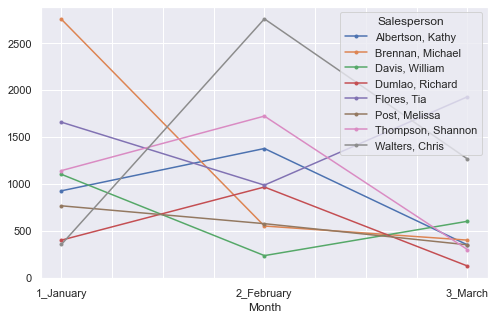

In [9]:
xlsx.pivot_table(
    index=['Month'],
    columns=['Salesperson'],
    values=['Order Amount'],
    aggfunc=sum
)['Order Amount'].plot(style='.-', figsize=(8, 5));

## Car mpg data set exploaration example

Downloaded from https://archive.ics.uci.edu/ml/datasets/Auto+MPG.

File preview (in bash):

In [10]:
!head files/auto-mpg.data.txt

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


Import the fixed width format:

In [11]:
mpg = pd.read_fwf('files/auto-mpg.data.txt', 
                  na_values='?',  # see documentation
                  header=0, 
                  names=['mpg', 'cylinders', 'displacement', 'horsepower',
                         'weight', 'acceleration', 'model year', 'origin', 'car name'])
                  
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car name      397 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


Mind the NA (NULL) values in the `horsepower` variable.

In [12]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""


Basic description:

In [13]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Useful for quick frequency calculation:

In [14]:
mpg['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [15]:
mpg['cylinders'].value_counts().sort_index()

3      4
4    204
5      3
6     84
8    102
Name: cylinders, dtype: int64

### Displacement (bins) vs horse power?

In [16]:
import numpy as np

Prepare the bins, as in the Excel groping:

In [17]:
bin_size = 50
disp_min = mpg['displacement'].min()
disp_max = mpg['displacement'].max()
bins = [disp_min + bin_size * s for s in np.arange(np.ceil((disp_max - disp_min) / bin_size))]

In [18]:
bins

[68.0, 118.0, 168.0, 218.0, 268.0, 318.0, 368.0, 418.0]

**Mean horse power by displacement bins**:

In [19]:
hp = mpg.groupby(np.digitize(mpg['displacement'], bins))['horsepower'].mean()
hp

1     72.333333
2     91.690476
3     98.476190
4    101.516667
5    143.583333
6    155.062500
7    175.750000
8    214.333333
Name: horsepower, dtype: float64

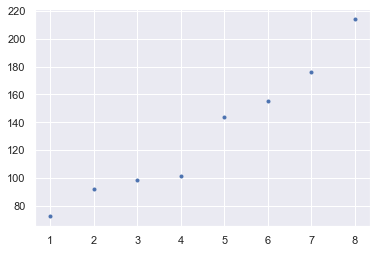

In [20]:
hp.plot(style='.');

**Linear regression**:

In [21]:
import statsmodels.api as sm

In [22]:
y = hp.values
y

array([ 72.33333333,  91.69047619,  98.47619048, 101.51666667,
       143.58333333, 155.0625    , 175.75      , 214.33333333])

In [23]:
X = hp.index.values
X

array([1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
X = sm.add_constant(X)
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.]])

In [25]:
model = sm.OLS(y, X)
results = model.fit()

In [26]:
results.params

array([44.47948554, 19.35860969])

Fit plot:

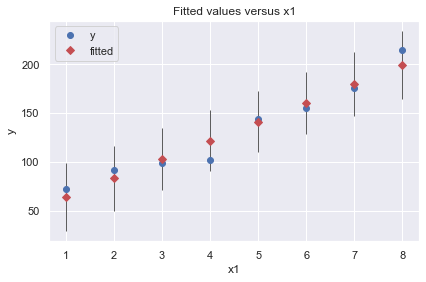

In [27]:
fig = sm.graphics.plot_fit(results, 'x1')
fig.tight_layout(pad=1.0)

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           4.37e-05
Time:                        15:32:48   Log-Likelihood:                -30.042
No. Observations:                   8   AIC:                             64.08
Df Residuals:                       6   BIC:                             64.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4795      9.306      4.780      0.0

/Users/matej/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


See more on [OLS](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).

## Assignment

1. Do similar analysis on your own data set
2. Use [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) to inspect the data set